In [14]:
import skimage
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

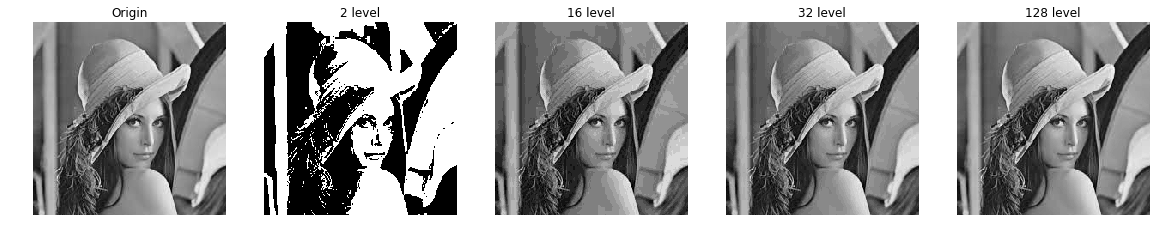

In [17]:
# read the image
#Quantization
img  = cv2.imread('Lenna.jpeg')
img  = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
Quant_level = [2, 16, 32 ,128]
plt.figure(figsize=(20,10))
plt.subplot(151)
plt.imshow(img,cmap='gray')
plt.title('Origin')
plt.axis('off')
i=1;
for n in Quant_level:
    de = 256/n;
    i+=1;
    img_quant = np.ceil(np.float32(img)/de)*256 #quantization
    title =str(n) + ' '+'level'
    axis = '15'+str(i)
    plt.subplot(axis)
    plt.imshow(img_quant,cmap='gray')
    plt.title(title)
    plt.axis('off')

Text(0.5,1,'36x36 pixels')

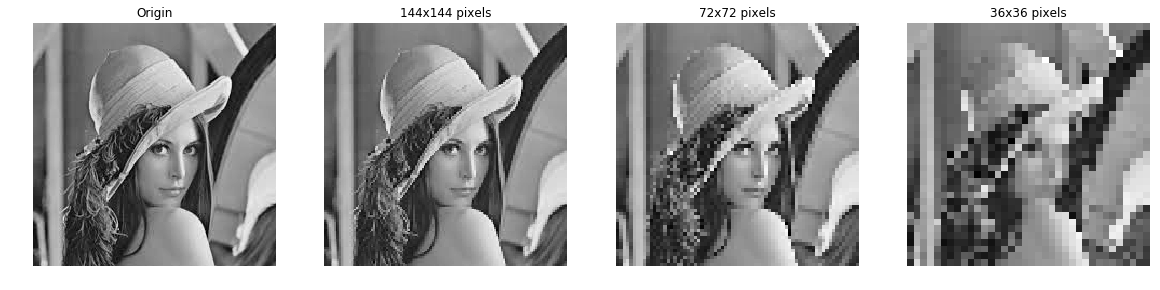

In [19]:
# Spatial sampling
plt.figure(figsize=(20,10))
plt.subplot(141)
plt.imshow(img,cmap='gray')
plt.axis('off')
plt.title('Origin')

img_192x144 = cv2.resize(img,(144,144), interpolation=cv2.INTER_CUBIC)
plt.subplot(142)
plt.imshow(img_192x144,cmap='gray')
plt.axis('off')
plt.title('144x144 pixels')

img_92x72 = cv2.resize(img,(72,72), interpolation=cv2.INTER_CUBIC)
plt.subplot(143)
plt.imshow(img_92x72,cmap='gray')
plt.axis('off')
plt.title('72x72 pixels')

img_48x36 = cv2.resize(img,(36,36), interpolation=cv2.INTER_CUBIC)
plt.subplot(144)
plt.imshow(img_48x36,cmap='gray')
plt.axis('off')
plt.title('36x36 pixels')

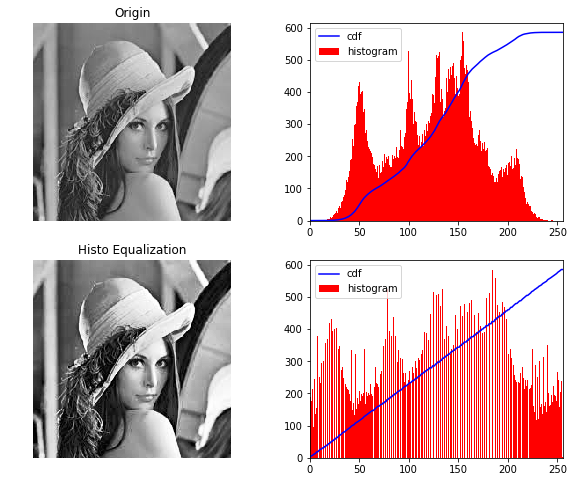

In [4]:
img  = cv2.imread('lenna.jpeg', 0)
plt.figure(figsize=(10,8))
plt.subplot(221)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title('Origin')

hist, img_bin = np.histogram(img.flatten(), 256, [0,256])
cdf = hist.cumsum()
cdf_normalize = cdf*hist.max()/cdf.max()
plt.subplot(222)
plt.plot(cdf_normalize, color='b')
plt.hist(img.flatten(), 256,[0,256], color='r');
plt.xlim([0,256]);
plt.legend(('cdf','histogram'),loc='upper left')


cdf_m = np.ma.masked_equal(cdf, 0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf_m = np.ma.filled(cdf_m, 0).astype('uint8')
img_equahis = cdf_m[img]
hist_equ, bin_equ = np.histogram(img_equahis.flatten(), 256, [0, 256])
cdf_equ = hist_equ.cumsum()
cdf_equ_norm = cdf_equ * hist_equ.max()/cdf_equ.max()

plt.subplot(223)
plt.imshow(img_equahis, cmap='gray')
plt.axis('off')
plt.title('Histo Equalization')

plt.subplot(224)
plt.plot(cdf_equ_norm, color='b')
plt.hist(img_equahis.flatten(), 256, [0, 256], color='r')
plt.xlim([0, 256])
plt.legend(('cdf', 'histogram'), loc='upper left')
plt.show()

(-0.5, 224.5, 224.5, -0.5)

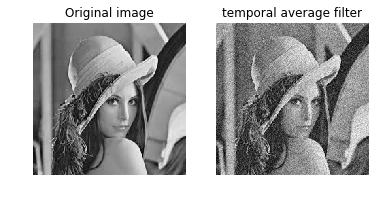

In [22]:
# Temporal Averaging
from skimage.util import random_noise
img_mat1 = np.ceil(img.copy()/256)
for i in range(0,10):
    img_mat1 += random_noise(img, mode='gaussian', var=0.01*i)
img_ave = img_mat1/10.0
plt.subplot(121)
plt.imshow(img,cmap='gray')
plt.title('Original image')
plt.axis('off')
plt.subplot(122)
plt.imshow(img_ave, cmap='gray')
plt.title('temporal average filter')
plt.axis('off')

/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


(-0.5, 224.5, 224.5, -0.5)

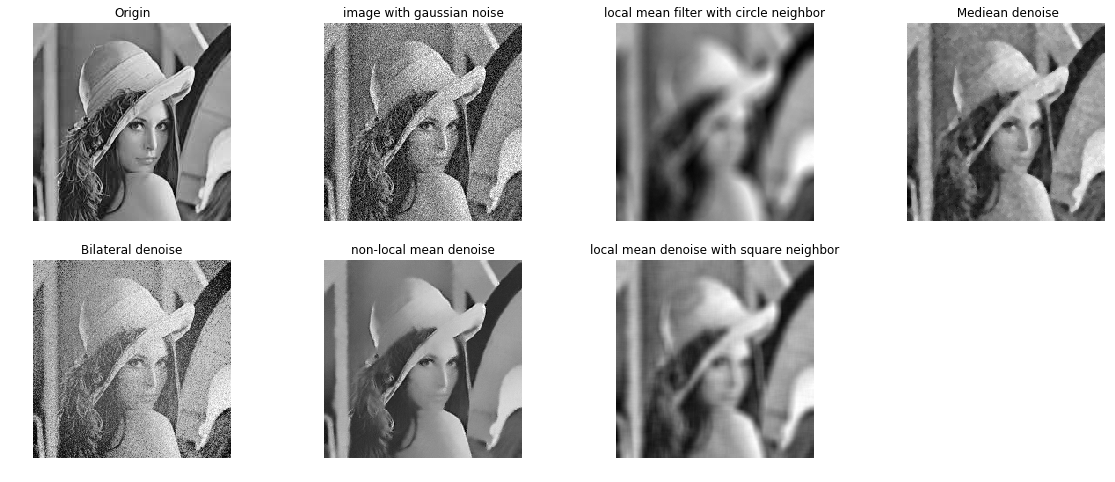

In [31]:
from skimage.morphology import disk,square
from skimage.filters.rank import mean, median
from skimage.restoration import denoise_bilateral, denoise_nl_means

img_noise = random_noise(img, mode='gaussian', var=0.01)
img_avg_disk = mean(img_noise, disk(10))
img_avg_square = mean(img_noise, square(10))
img_mediean = median(img_noise, disk(3))
img_bilateral = denoise_bilateral(img_noise, sigma_spatial=30, multichannel=False)
img_nonlocal_mean = denoise_nl_means(img_noise, patch_size=7, patch_distance=11, multichannel=False)

plt.figure(figsize=(20,8))
plt.subplot(241)
plt.imshow(img, cmap='gray')
plt.title('Origin')
plt.axis('off')

plt.subplot(242)
plt.imshow(img_noise, cmap='gray')
plt.title('image with gaussian noise')
plt.axis('off')

plt.subplot(243)
plt.imshow(img_avg_disk, cmap='gray')
plt.title('local mean filter with circle neighbor')
plt.axis('off')

plt.subplot(244)
plt.imshow(img_mediean, cmap='gray')
plt.title(' Mediean denoise')
plt.axis('off')

plt.subplot(245)
plt.imshow(img_bilateral, cmap='gray')
plt.title('Bilateral denoise')
plt.axis('off')

plt.subplot(246)
plt.imshow(img_nonlocal_mean, cmap='gray')
plt.title('non-local mean denoise')
plt.axis('off')

plt.subplot(247)
plt.imshow(img_avg_square, cmap='gray')
plt.title('local mean denoise with square neighbor')
plt.axis('off')

(-0.5, 224.5, 224.5, -0.5)

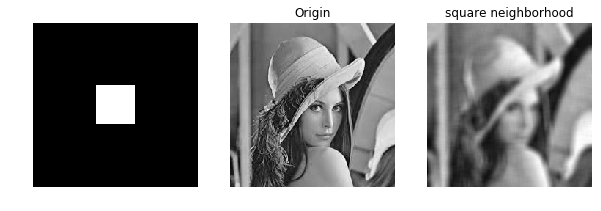

In [36]:
from skimage.morphology import disk,square
box = np.zeros((250,250))
box[95:155,95:155] =1

plt.figure(figsize=(10,8))

plt.subplot(131)
plt.imshow(box,cmap='gray')
plt.axis('off')

plt.subplot(132)
plt.imshow(img, cmap='gray')
plt.title('Origin')
plt.axis('off')

plt.subplot(133)
plt.imshow(img_avg_square, cmap='gray')
plt.title('square neighborhood')
plt.axis('off')

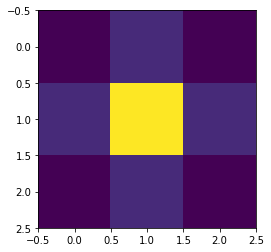

In [56]:
def matlab_style_gauss2D(shape=(3,3),sigma=0.5):
    """
    2D gaussian mask - should give the same result as MATLAB's
    fspecial('gaussian',[shape],[sigma])
    """
    m,n = [(ss-1.)/2. for ss in shape]
    y,x = np.ogrid[-m:m+1,-n:n+1]
    h = np.exp( -(x*x + y*y) / (2.*sigma*sigma) )
    h[ h < np.finfo(h.dtype).eps*h.max() ] = 0
    sumh = h.sum()
    if sumh != 0:
        h /= sumh
    return h

gaussian_filter = matlab_style_gauss2D(shape=(3,3))
plt.imshow(gaussian_filter)

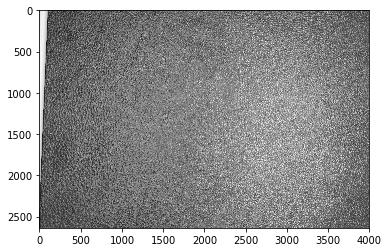

In [49]:
test = cv2.imread('/Users/xiaojun/Desktop/sample_photo/归档/DSCF7051.JPG')
test = cv2.cvtColor(test, cv2.COLOR_BGR2GRAY)
test = test[264:2900, 400:4400]
plt.imshow(test,cmap='gray')

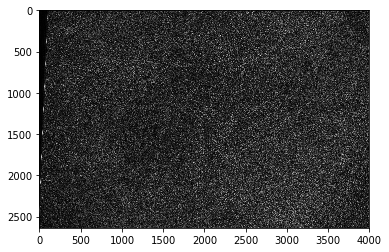

In [50]:
from skimage.filters import sobel
test_sobel = sobel(test)
plt.imshow(test_sobel, cmap='gray')